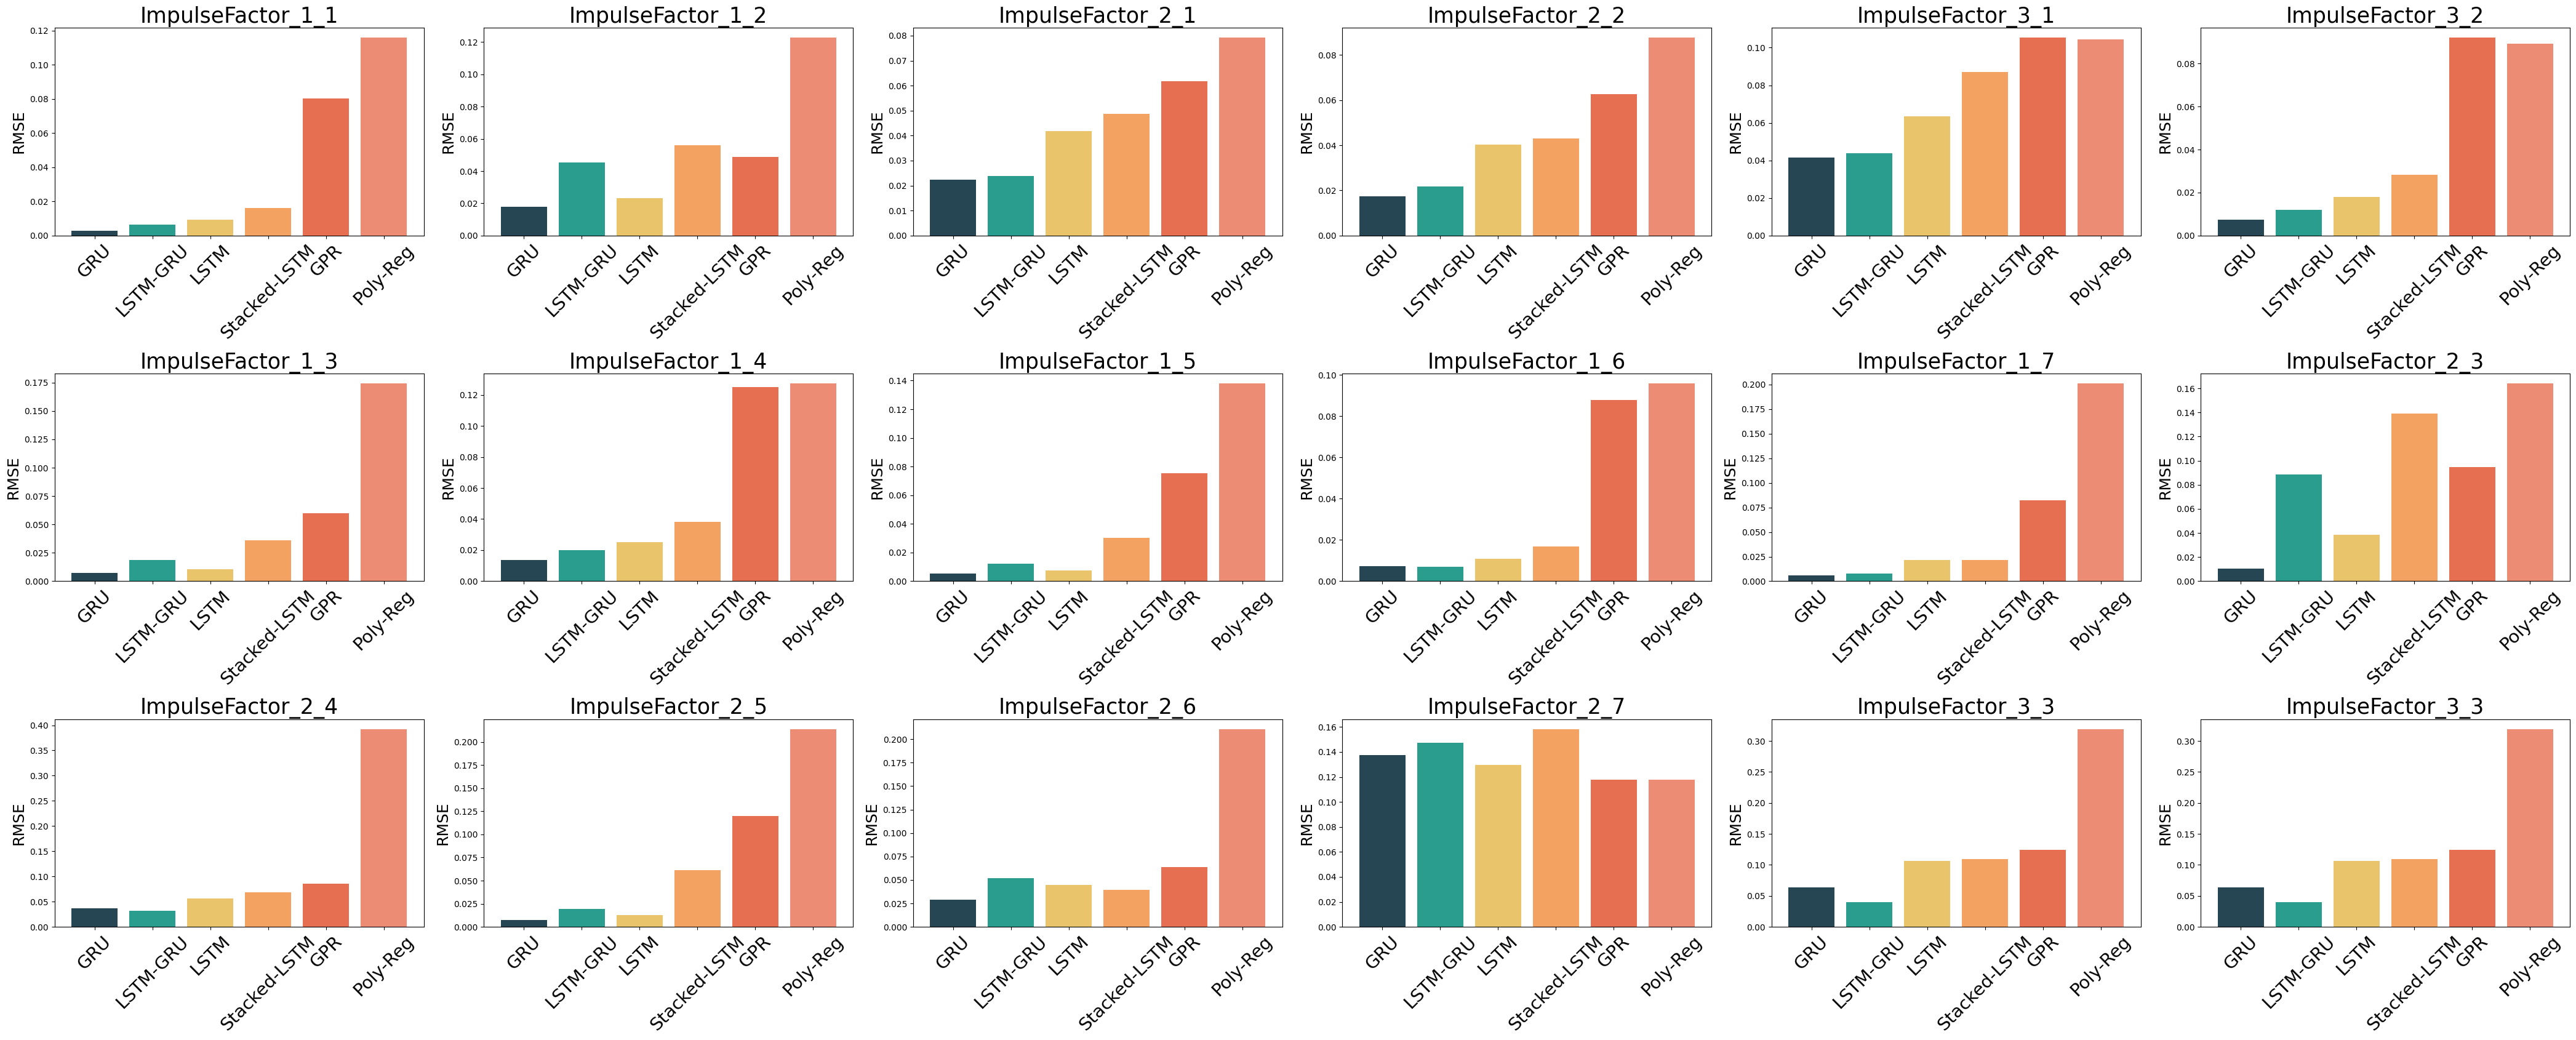

In [144]:
import json
import matplotlib.pyplot as plt

# Load JSON data for each model
Poly_Reg_Logistic_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json") as json_file:
    Poly_Reg_Logistic_dat = json.load(json_file)

GPR_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json") as json_file:
    GPR_dat = json.load(json_file)

LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json") as json_file:
    LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json") as json_file:
    Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json") as json_file:
    GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json") as json_file:
    LSTM_GRU_dat = json.load(json_file)

# Function to get the max/min metric score across data splits
def getMetricScore(source: list, score: str, method: str = 'max'):
    """
    source: list containing performance data
    score: the metric to consider ('R2', 'MAE', etc.)
    method: 'max' to return maximum value, 'min' to return minimum value
    """

    def getMin(numbers):
        return min(numbers, key=abs)
    
    def getMax(numbers):
        return max(numbers, key=abs)
    
    dat = []
    for x in source:
        splits = list(x.values())[0]  # Retrieve the dictionary for each bearing
        values = [split[score] for split in splits]  # Get the values for different splits
        if method == 'max':
            dat.append(getMax(values))
        elif method == 'min':
            dat.append(getMin(values))
        elif method == 'avg':
            dat.append(np.mean(values))
    return dat

import numpy as np

# Prepare bearing IDs and configuration
bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
# bearing_ids = sorted(bearing_ids)
config = "nrmse"  # Metric to evaluate ('R2', 'MAE', etc.)
method = 'min'  # Select 'max' or 'min' to plot the best metric across splits

# Get R2 for 25% training split (max/min across splits)
r2_best_perc = {
    'GRU': getMetricScore(GRU_dat, config, method),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config, method),
    'LSTM': getMetricScore(LSTM_dat, config, method),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config, method),
    'GPR_Logistic': getMetricScore(GPR_dat, config, method),
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config, method),
}

# Plot the results
fig, axes = plt.subplots(3, 6, figsize=(42, 1 * len(bearing_ids)))

min_val, max_val = min(np.array([i for i in r2_best_perc.values()]).flatten()), max(np.array([i for i in r2_best_perc.values()]).flatten())

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, len(bearing_ids) - 1)
        # if(bearing_ids[index].split("_")[1] != "1"): continue

        # Sort models by performance metric (R²)
        keys = list(r2_best_perc.keys())
        values = [d[index] for d in r2_best_perc.values()]
        # zipped = zip(keys, values)
        # sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=(method == 'max'))
        # keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        custom_colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#ec8c74']
        ax.bar(keys, values, color=custom_colors)
        # ax.set_ylim(min_val, max_val)
        ax.set_xticks(range(len(keys)))
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45, size=21)
        ax.set_title(bearing_ids[index], size=25)
        ax.set_ylabel('RMSE', size=18)


plt.tight_layout()
plt.show()


In [145]:
r2_best_perc["GPR_Logistic"]

[0.08030655309141303,
 0.048607695895770964,
 0.06186737578324365,
 0.06267662357440715,
 0.10524788300865379,
 0.0920422109640084,
 0.0599915680086195,
 0.1250988563170474,
 0.07529569587105435,
 0.08773083838991186,
 0.08250458150721637,
 0.0946378798289887,
 0.08598842098673429,
 0.12003245731642247,
 0.06400596194347659,
 0.11781007460195854,
 0.12452948818294794]

In [146]:
import pandas as pd
x = r2_best_perc
df = pd.DataFrame(x) #, index = [""]*len(x)) #.to_clipboard()
df["bearing"] = bearing_ids
# set index to bearing ID
df.set_index("bearing", inplace=True)
df.sort_values(by="bearing", inplace=True)
print(df)

                        GRU  LSTM-GRU      LSTM  Stacked-LSTM  GPR_Logistic  \
bearing                                                                       
ImpulseFactor_1_1  0.002842  0.006244  0.009310      0.016060      0.080307   
ImpulseFactor_1_2  0.017987  0.045501  0.023386      0.055992      0.048608   
ImpulseFactor_1_3  0.007562  0.018717  0.010383      0.035918      0.059992   
ImpulseFactor_1_4  0.013550  0.020140  0.025144      0.038351      0.125099   
ImpulseFactor_1_5  0.005490  0.012416  0.007650      0.030329      0.075296   
ImpulseFactor_1_6  0.007221  0.007142  0.010941      0.016970      0.087731   
ImpulseFactor_1_7  0.005976  0.007893  0.021425      0.021646      0.082505   
ImpulseFactor_2_1  0.022410  0.023751  0.041785      0.048785      0.061867   
ImpulseFactor_2_2  0.017403  0.021646  0.040288      0.042907      0.062677   
ImpulseFactor_2_3  0.010513  0.088750  0.038290      0.139088      0.094638   
ImpulseFactor_2_4  0.037116  0.032081  0.056226     

In [147]:
print(df.columns.values)

['GRU' 'LSTM-GRU' 'LSTM' 'Stacked-LSTM' 'GPR_Logistic' 'Poly-Reg_Logistic']


In [148]:
def compute_score(percent_error):
    if percent_error <= 0:  # Late predictions
        return np.exp(-np.log(0.5) * (percent_error / 5))
    else:  # Early predictions
        return np.exp(np.log(0.5) * (percent_error / 20))

In [149]:
for model in df.columns.values:
    idx = 14
    print(f"{model}:", end=" ")
    for i in df[model].values[idx:idx+7]:
        print(f"& {round(i, 2)}\%", end = " ")
    print(f"& {round(compute_score(np.mean(df[model].values[idx:idx+7])), 4)}", end= "")
    print()

GRU: & 0.04\% & 0.01\% & 0.06\% & 0.9987
LSTM-GRU: & 0.04\% & 0.01\% & 0.04\% & 0.9989
LSTM: & 0.06\% & 0.02\% & 0.11\% & 0.9978
Stacked-LSTM: & 0.09\% & 0.03\% & 0.11\% & 0.9974
GPR_Logistic: & 0.11\% & 0.09\% & 0.12\% & 0.9963
Poly-Reg_Logistic: & 0.1\% & 0.09\% & 0.32\% & 0.9941


In [150]:
print(df.columns.values)

['GRU' 'LSTM-GRU' 'LSTM' 'Stacked-LSTM' 'GPR_Logistic' 'Poly-Reg_Logistic']


In [157]:
model = "Poly-Reg_Logistic"
print(np.mean([x for x in df[model].values[0:7]]))
print(np.mean([x for x in df[model].values[7:13]]))
print(np.mean([x for x in df[model].values[14:]]))

0.1393080936684059
0.19134099660133874
0.17101475510251893
